In [273]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import datetime
from scipy import stats
warnings.filterwarnings('ignore')


data = pd.read_csv('dog_rates_tweets.csv').set_index(keys=['id'])
search_key = r'(\d+(\.\d+)?)/10'
rated_data = data.loc[data['text'].str.contains(search_key)]
rated_data['rating'] = rated_data['text'].str.extract(search_key, expand=False)[0].values


rated_data['rating'] = rated_data['rating'].astype(str).astype(float)
rated_data = rated_data[rated_data.rating <= 25.0]

rated_data['created_at'] = rated_data['created_at'].astype(str)
rated_data['created_at'] = pd.to_datetime(rated_data['created_at'].values, format='%Y-%m-%d %H:%M:%S')
first_day = rated_data['created_at'].values.min()
rated_data['timestamp'] = (rated_data['created_at'] - first_day) / np.timedelta64(1, 's')

x = rated_data['timestamp'].values
y = rated_data['rating'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

rated_data['predict'] = rated_data['timestamp'] * slope + intercept

rated_data

,created_at,text,rating,timestamp,predict
id,,,,,
994363623421153280,2018-05-09 23:48:56,b'This is Louie. He has misplaced his Cheerio....,14.0,70442116.0,13.706036
993889039714578432,2018-05-08 16:23:07,b'This is Manny. He hasn\xe2\x80\x99t seen you...,13.0,70328967.0,13.700870
993629544463642624,2018-05-07 23:11:58,b'This is Libby. She leap. 14/10\n(IG: libbyth...,14.0,70267098.0,13.698046
992198572664860672,2018-05-04 00:25:48,b'This is Rosie. She thought Coachella was thi...,13.0,69925928.0,13.682471
991744041351090177,2018-05-02 18:19:39,b'This is Riley. He\xe2\x80\x99ll be your chau...,13.0,69817559.0,13.677524
991399795892916224,2018-05-01 19:31:45,b'This is B-Mo. He has a heart on his butt and...,13.0,69735485.0,13.673777
990987750601093120,2018-04-30 16:14:26,b'Say hello to Meatball. I\xe2\x80\x99m told h...,13.0,69637246.0,13.669293
989657223084244992,2018-04-27 00:07:23,b'This is Oakley. He picked you some flowers. ...,14.0,69320023.0,13.654811
989300750152069120,2018-04-26 00:30:53,b'Meet Max. She pouts until someone holds her....,12.0,69235033.0,13.650931


In [274]:
slope, intercept

(4.5650941366882184e-08, 10.490286831987644)

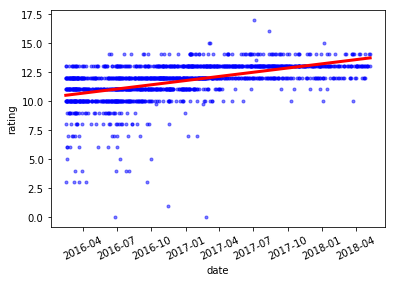

In [275]:
plt.plot(rated_data['created_at'], rated_data['rating'], 'b.', alpha=0.5)
plt.plot(rated_data['created_at'], rated_data['predict'], 'r-', linewidth=3)
plt.xticks(rotation=25)

plt.xlabel('date')
plt.ylabel('rating')
plt.show()